In [110]:
import numpy as np
import scipy.ndimage #import gaussian_filter
import matplotlib.pyplot as plt
%matplotlib inline
import PIL

(512, 512)


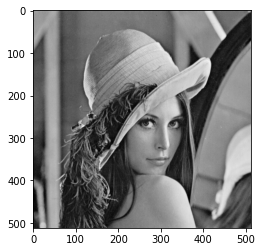

In [184]:
image = plt.imread("./image/lena512.pgm")
print(image.shape)
plt.imshow(image,cmap="gray")

In [188]:
def gaussian2DFilter(size,sigma=1):
    constant = 1/(2*np.pi*sigma*sigma)
    mean = int(size/2)
    kernel = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            power = ((j-mean)**2+(i-mean)**2)/(sigma)**2
            power = (-power)/2
            kernel[i][j] = np.exp(power)*constant
    return kernel/kernel.sum()

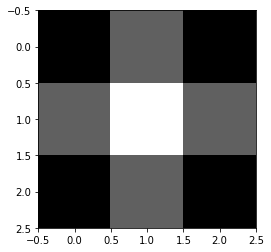

In [189]:
plt.imshow(gaussian2DFilter(3,1),cmap="gray")

In [190]:
def convolution(image,kernel):
    num_rows,num_cols,num_channels = image.shape
    rows = np.array([j+(i*num_cols)+ (num_cols*num_rows*k) for k in range(num_channels) for i in range(kernel.shape[0]) for j in range(kernel.shape[1])])
    cols = np.array([j+(i*num_cols) for i in range(num_cols-kernel.shape[1]+1) for j in range(num_cols-kernel.shape[1]+1)])
    grid = rows[None,:]+cols[:,None]
    image_tr = image.transpose(2,0,1)
    kernel_tr = kernel.transpose(2,0,1)
    conv = np.dot(image_tr.take(grid),kernel_tr.flatten())
    out_h,out_w = (image.shape[0]-kernel.shape[0]+1),(image.shape[1]-kernel.shape[1]+1)
    conv = conv.reshape(out_h,out_w)
    return conv

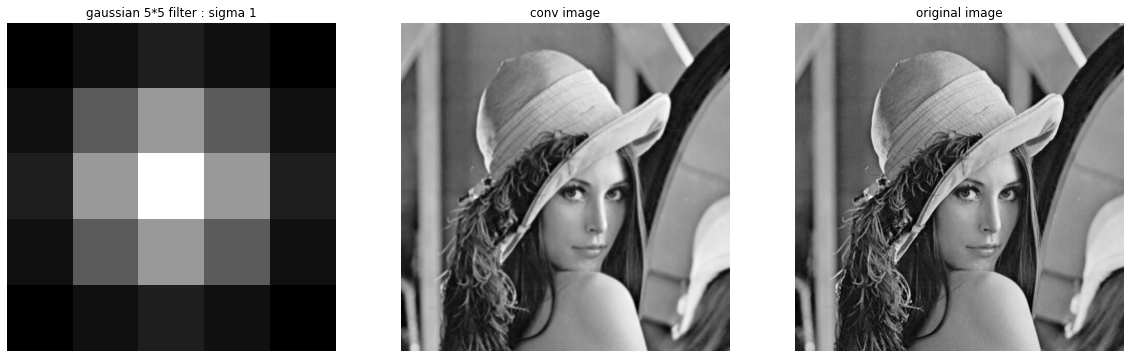

In [220]:
filter_size = 5
sigma = 1
gaussian_filter = gaussian2DFilter(filter_size,sigma=sigma)
conv_image = convolution(image.reshape(*image.shape,1),gaussian_filter.reshape(*gaussian_filter.shape,1))

plt.figure(figsize = (20, 20))
plt.subplot(1,3,1)
plt.imshow(gaussian_filter,cmap="gray")
plt.title(f"gaussian {filter_size}*{filter_size} filter : sigma {sigma}")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(conv_image,cmap="gray")
plt.axis("off")
plt.title("conv image")
plt.subplot(1,3,3)
plt.imshow(image,cmap="gray")
plt.title("original image")
plt.axis("off")
plt.show()

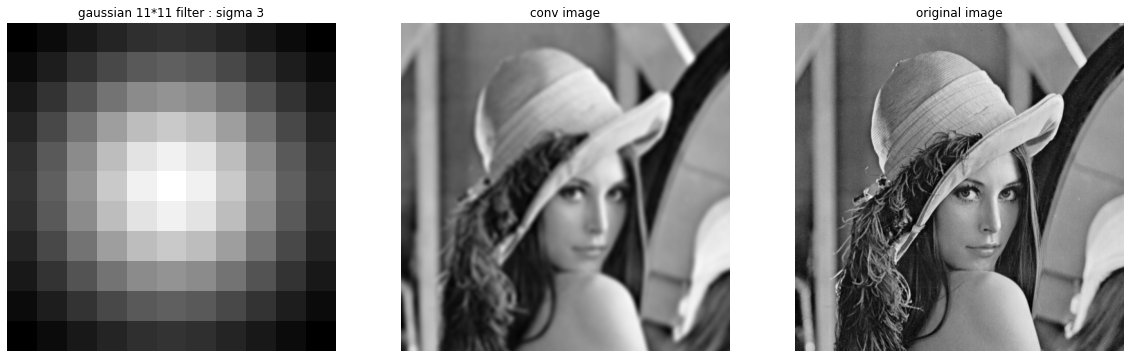

In [219]:
filter_size = 11
sigma = 3
gaussian_filter = gaussian2DFilter(filter_size,sigma=sigma)
conv_image = convolution(image.reshape(*image.shape,1),gaussian_filter.reshape(*gaussian_filter.shape,1))

plt.figure(figsize = (20, 20))
plt.subplot(1,3,1)
plt.imshow(gaussian_filter,cmap="gray")
plt.title(f"gaussian {filter_size}*{filter_size} filter : sigma {sigma}")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(conv_image,cmap="gray")
plt.axis("off")
plt.title("conv image")
plt.subplot(1,3,3)
plt.imshow(image,cmap="gray")
plt.title("original image")
plt.axis("off")
plt.show()

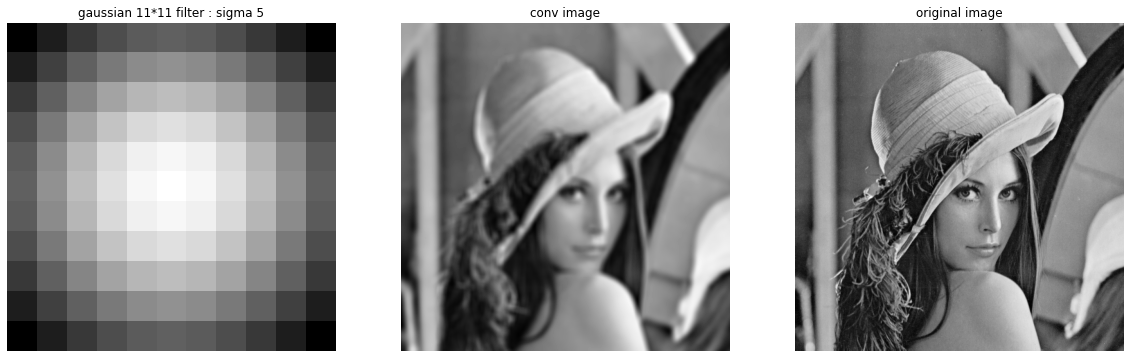

In [221]:
filter_size = 11
sigma = 5
gaussian_filter = gaussian2DFilter(filter_size,sigma=sigma)
conv_image = convolution(image.reshape(*image.shape,1),gaussian_filter.reshape(*gaussian_filter.shape,1))

plt.figure(figsize = (20, 20))
plt.subplot(1,3,1)
plt.imshow(gaussian_filter,cmap="gray")
plt.title(f"gaussian {filter_size}*{filter_size} filter : sigma {sigma}")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(conv_image,cmap="gray")
plt.axis("off")
plt.title("conv image")
plt.subplot(1,3,3)
plt.imshow(image,cmap="gray")
plt.title("original image")
plt.axis("off")
plt.show()

In [256]:
def saltAndPepperNoise(image,probab = 0.1):
    threshold = 1-probab
    r,c = image.shape
    noisy_image = np.zeros((r,c))
    for i in range(r):
        for j in range(c):
            rand = np.random.random()
            if rand<probab:
                noisy_image[i][j] = 0
            elif rand>threshold:
                noisy_image[i][j] = 255
            else:
                noisy_image[i][j] = image[i][j]
    return noisy_image

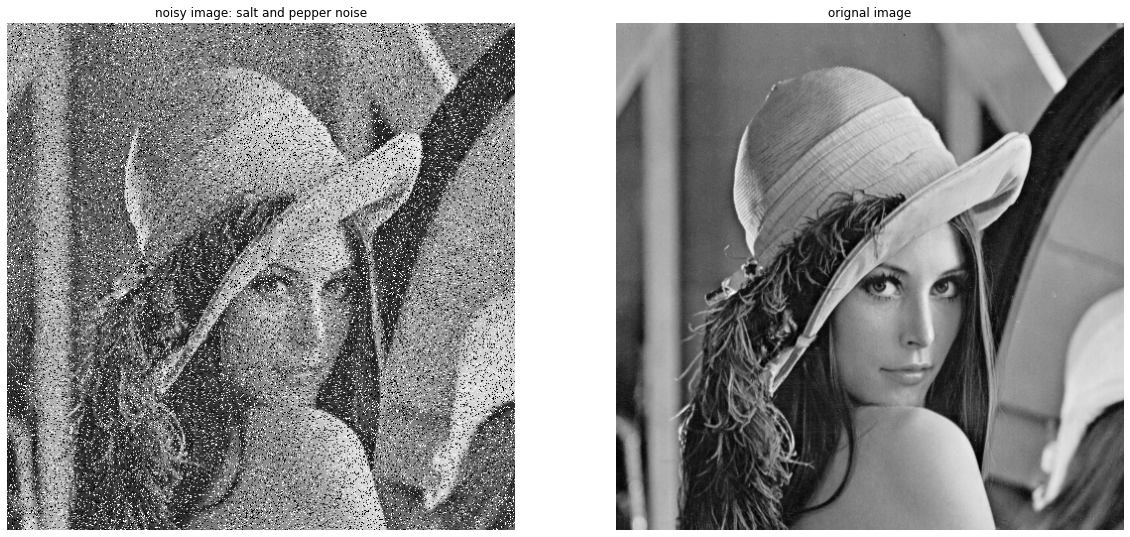

In [259]:
noisy_image = saltAndPepperNoise(image)
plt.figure(figsize = (20, 20))
plt.subplot(1,2,1)
plt.imshow(noisy_image,"gray")
plt.title("noisy image: salt and pepper noise")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(image,"gray")
plt.title("orignal image")
plt.axis("off")
plt.show()

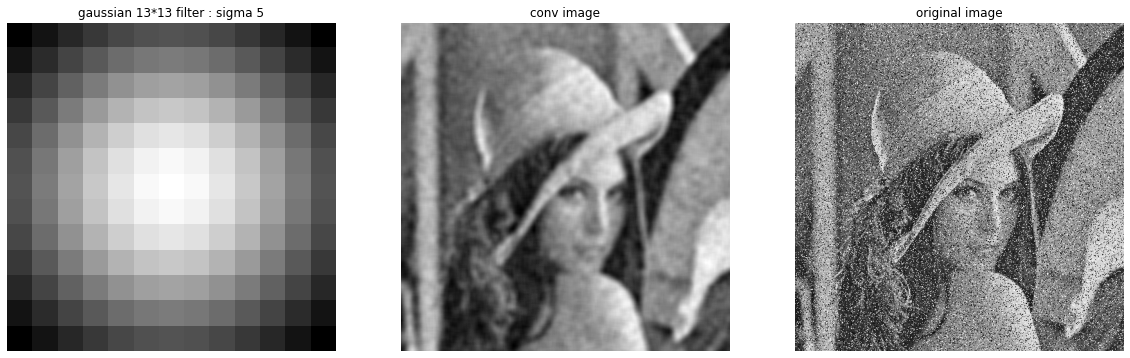

In [281]:
filter_size = 13
sigma = 5
gaussian_filter = gaussian2DFilter(filter_size,sigma=sigma)
conv_image = convolution(noisy_image.reshape(*noisy_image.shape,1),gaussian_filter.reshape(*gaussian_filter.shape,1))

plt.figure(figsize = (20, 20))
plt.subplot(1,3,1)
plt.imshow(gaussian_filter,cmap="gray")
plt.title(f"gaussian {filter_size}*{filter_size} filter : sigma {sigma}")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(conv_image,cmap="gray")
plt.axis("off")
plt.title("conv image")
plt.subplot(1,3,3)
plt.imshow(noisy_image,cmap="gray")
plt.title("original image")
plt.axis("off")
plt.show()

In [282]:
def mean2DFilter(size):
    kernel = np.ones((size,size))
    return kernel/(size*size)

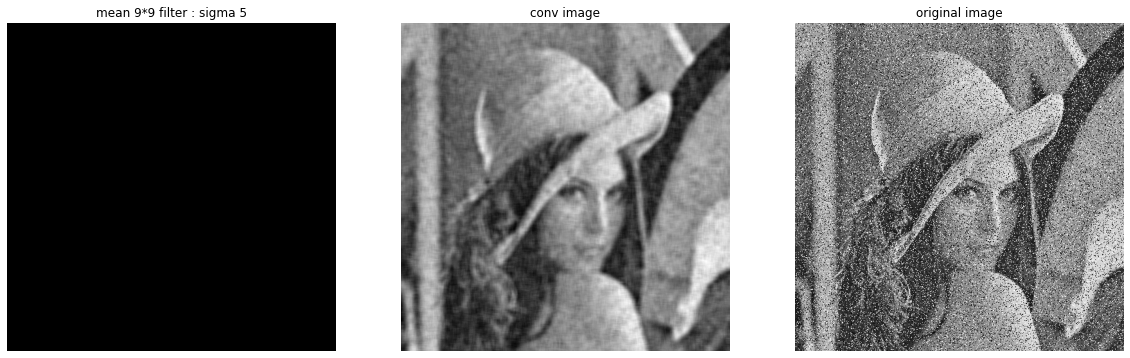

In [285]:
filter_size = 9
median_filter = mean2DFilter(filter_size)
conv_image = convolution(noisy_image.reshape(*noisy_image.shape,1),median_filter.reshape(*median_filter.shape,1))

plt.figure(figsize = (20, 20))
plt.subplot(1,3,1)
plt.imshow(median_filter,cmap="gray")
plt.title(f"mean {filter_size}*{filter_size} filter : sigma {sigma}")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(conv_image,cmap="gray")
plt.axis("off")
plt.title("conv image")
plt.subplot(1,3,3)
plt.imshow(noisy_image,cmap="gray")
plt.title("original image")
plt.axis("off")
plt.show()